In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
db = pd.read_csv("clean_readable_db.csv")
db = db.drop_duplicates(subset="ANON_ID", keep='first')

## Full head and neck dataset covers 2014 - 2022
### First step is to exclude patients who did not receive RT or who underwent surgery, as this would majorly change the outcome prospects w/r/t xerostomia
We will accept any patient treatment tagged as "CCRT", "RT only", or "ICT+ CCRT"

In [21]:
viable_treatments = ['CCRT', 'RT only', 'ICT+ CCRT']
db = db[(db['Treatment Type ']=='CCRT')|(db['Treatment Type ']=='RT only')|(db['Treatment Type ']=='ICT+ CCRT')]

(array([765.,   0., 192.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <BarContainer object of 3 artists>)

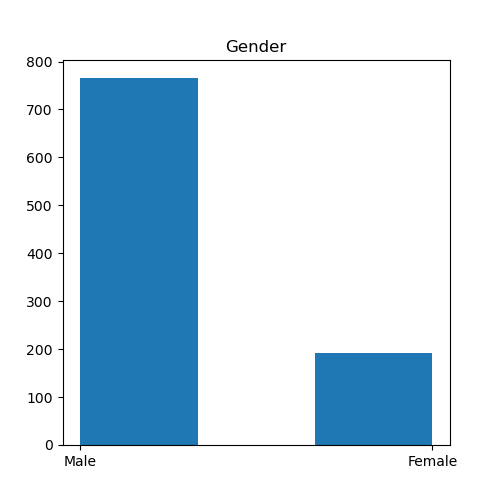

In [22]:
%matplotlib widget
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Gender")
ax.hist(db['Gender'],bins=3)

In [55]:
db['Disease Site_1'].value_counts()

Pharynx                               558
Larynx                                251
Lateral neck                           44
Lip and Oral Cavity                    43
Other                                  14
Nasal Cavity and Paranasal Sinuses     12
Major Salivary Glands                   9
Ear                                     3
Lower face                              2
Thyroid Gland                           2
Anterior neck                           1
Posterior neck                          1
Name: Disease Site_1, dtype: int64

In [56]:
db['Subsite_1'].value_counts()

Oropharynx                        450
Supraglottis                      131
Glottis                           104
Hypopharynx                        72
Oral Cavity                        37
Nasopharynx                        36
Parotid Gland                       8
Nasal Cavity and Ethmoid Sinus      8
Lip                                 6
Maxillary Sinus                     4
Subglottis                          1
Name: Subsite_1, dtype: int64

In [58]:
db['T Stage Clinical '].value_counts()

T3     292
T2     264
T1     123
T4      79
T4a     64
T0      57
T1a     18
T4b     18
T1b      7
TX       4
Tis      2
T2a      1
Name: T Stage Clinical , dtype: int64

(array([386.,   0., 190.,   0., 364.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

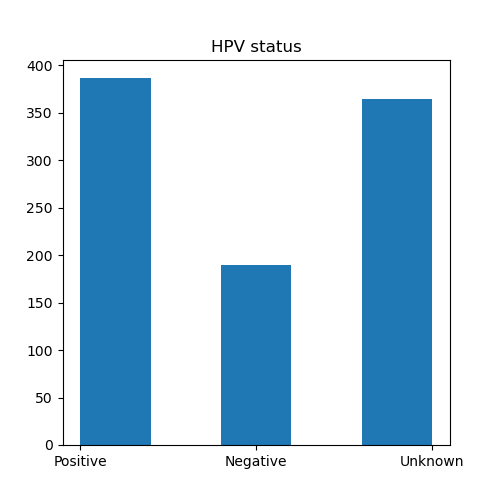

In [28]:
%matplotlib widget
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("HPV status")
ax.hist(db['HPV status'].dropna(),bins=5)

(array([196.,   0.,   0.,   0., 522.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

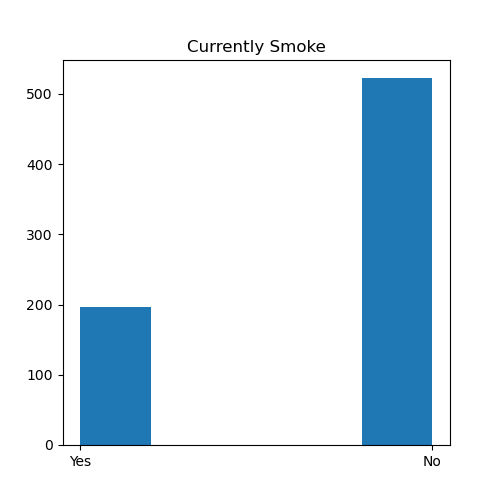

In [38]:
%matplotlib widget
fig,ax = plt.subplots(figsize=(5,5))
ax.set_title("Currently Smoke")
ax.hist(db['Currently Smoke'].dropna(),bins=5)

(array([[ 24.,   0.,   0.,   0., 917.,   0.,   0.,   0.,   3.,   0.,   0.,
           0.,   9.,   0.,   0.,   0.,   3.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 2 BarContainer objects>)

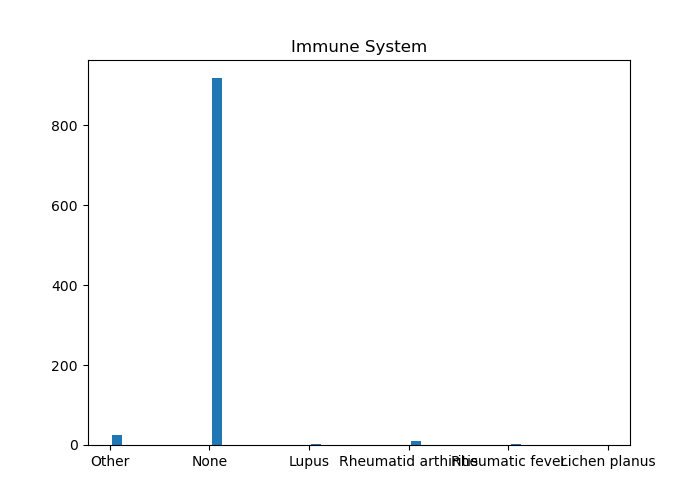

In [35]:
%matplotlib widget
fig,ax = plt.subplots(figsize=(7,5))
ax.set_title("Immune System")
ax.hist((db['Immune System_1'].dropna().values,db['Immune System_2'].dropna().values),bins=20)

This was the category that encompassed Sjorgen's Disease, which impacts swallowing and salivary production. It looks like our previous filter (based on type of treatment received) has already excluded all of those cases.